# Task 3

In [1]:
!pip install librosa pydub pysoundfile SpeechRecognition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

In [3]:
CWD = '/content/drive/MyDrive/Colab Notebooks/CSIT/CSIT_DS_Mini-Challenge/CSIT_DS_Mini-Challenge/'

audio, sr = librosa.load(f'{CWD}Task_3/C.Noisy_Voice.wav')

In [ ]:
audio.shape

(192560,)

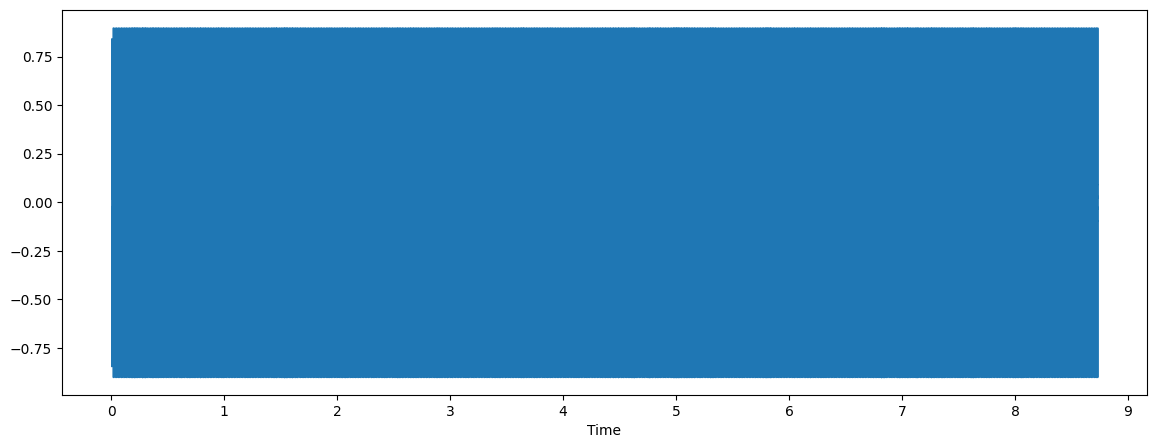

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)

In [ ]:
Audio(audio, rate=sr) # load a local WAV file

In [4]:
# Resample original audio to 4khz to filter high frequency signals (> 2 khz)
resampled_audio = librosa.resample(y=audio, orig_sr=sr, target_sr=4000)

In [ ]:
Audio(resampled_audio, rate=4000)

In [5]:
import soundfile as sf

# Write audio output from array
sf.write(f'{CWD}Task_3/resampled.wav', resampled_audio, samplerate=4000)

# Boost gain
data, sr = librosa.load(f'{CWD}Task_3/resampled.wav')
factor = 10.0
data *= factor
sf.write(f'{CWD}Task_3/resampled.wav', data, sr)

In [44]:
Audio(f'{CWD}Task_3/resampled.wav', rate=4000)

In [6]:
!pip install -U openai-whisper

In [7]:
import whisper

print(whisper.available_models())

['tiny.en', 'tiny', 'base.en', 'base', 'small.en', 'small', 'medium.en', 'medium', 'large-v1', 'large-v2', 'large-v3', 'large']


In [8]:
model = whisper.load_model("large-v2")

In [9]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio(f'{CWD}Task_3/resampled.wav')
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

Detected language: tr


In [13]:
# transcribe the audio
transcription = model.transcribe(f'{CWD}Task_3/resampled.wav', language="tr")
print(transcription['text'])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Senin için buradayım. Beni içeri al, sadece birbirimize sahibiz. Sadece sen ve ben. Ne yapacağız? Kardan adam yapmak ister misin?
